In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras import Sequential
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score

In [2]:
data = pd.read_csv(
    'Armenian Market Car Prices.csv')

#data.describe()
data.head()

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500


In [3]:
X = np.array(data[[
    "Car Name", "Year", "Mileage", "Price"
]])

car_name = np.array(data["Car Name"])

car_name_new = []
for str in car_name:
    car_name_new.append(str.split()[0])
print(len(car_name_new))

for i in range (len(car_name_new)):
    X[i][0] = car_name_new[i]


#print(X[:5])

7995


In [15]:
X = pd.DataFrame(X, columns=[
    'Car Name', 'Year', 'Mileage', 'Price'])


car_name_counts = X['Car Name'].value_counts()

X_filtered = X[X['Car Name'].isin(
    car_name_counts[
     car_name_counts >= 100].index)]

# X_filtered["Car Name"].value_counts().describe()
y = z = X_filtered["Price"]
z = z[:-5351]
# print(y.shape)
# print(z.describe)
y.describe()

<bound method NDFrame.describe of 0       12000
1       11500
2        4000
3       22000
4        3500
        ...  
2011    19000
2012    10300
2013    13300
2014    13500
2015     4000
Name: Price, Length: 1784, dtype: object>


count     7135
unique     518
top       4000
freq       170
Name: Price, dtype: int64

In [5]:
X_filtered.drop("Price", axis = 1)
X_encoded = pd.get_dummies(X_filtered, columns=['Car Name'])

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# le = LabelEncoder()
#X_encoded['Car Name'] = le.fit_transform(X_filtered ['Car Name'])

# scaler = MinMaxScaler()
# X_encoded = scaler.fit_transform(X_encoded)

# X_encoded = np.array(X_encoded)
# X_tensor = tf.convert_to_tensor(X_encoded)

print(X_encoded.shape)
X_encoded[:5]

(7135, 19)


,Year,Mileage,Price,Car Name_BMW,Car Name_Chevrolet,Car Name_Ford,Car Name_Honda,Car Name_Hyundai,Car Name_Jeep,Car Name_Kia,Car Name_Lexus,Car Name_Mazda,Car Name_Mercedes-Benz,Car Name_Mitsubishi,Car Name_Nissan,Car Name_Opel,Car Name_Toyota,Car Name_VAZ,Car Name_Volkswagen
0,2002,215000,12000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2017,72000,11500,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1998,466000,4000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,2020,100000,22000,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,1998,318000,3500,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25)

X_train = np.array(X_train).reshape(-1, 19)
X_test = np.array(X_test).reshape(-1, 19)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)



In [7]:
model = Sequential([
    keras.Input(shape=(19, )),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='mse', optimizer='adam')

model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 257854.2188
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3081.5686
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 200.8655  
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 871.0125
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 389.3249
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 433.2246
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 81930.3438
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 641.7535
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1901.3293
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 21817.2539
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3103.0908
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1392.7925
Epoch 13/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 5527.7954
Epoch 14/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29692.5957
Epoc

In [9]:
prediction = model.predict(X_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


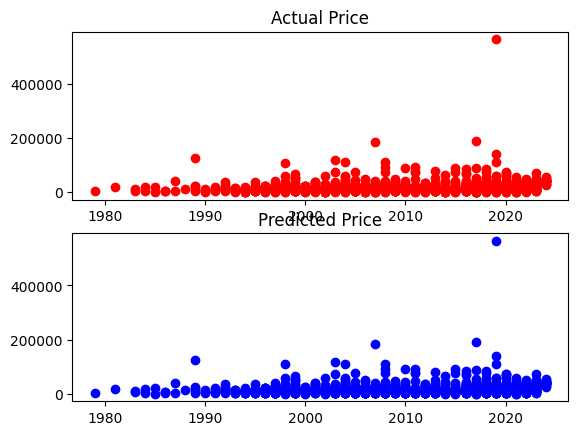

In [10]:
fig, ax = plt.subplots(2, 1)

ax[0].scatter(X_test[:, 0], y_test, color = 'red')
ax[0].title.set_text('Actual Price')

ax[1].scatter(X_test[:, 0], prediction, color = 'blue')
ax[1].title.set_text('Predicted Price')

In [14]:
# print(X_test[2].shape, prediction.shape)
print(X_test[: , 1].shape)
model.evaluate(X_test, y_test)

(1784,)
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 683.5085


566.0100708007812

In [16]:
from sklearn import preprocessing

y_test_scaled = preprocessing.normalize(y_test)
prediction_scaled = preprocessing.normalize(prediction)

print("Precision:", precision_score(
    y_test_scaled, prediction_scaled)) 

print('Recall:', recall_score(
    y_test_scaled, prediction_scaled)) 

print('F1 score:', f1_score(
    y_test_scaled, prediction_scaled)) 

Precision: 1.0
Recall: 1.0
F1 score: 1.0
